### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from MyMLP.MyMLP import MyMLP

In [3]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

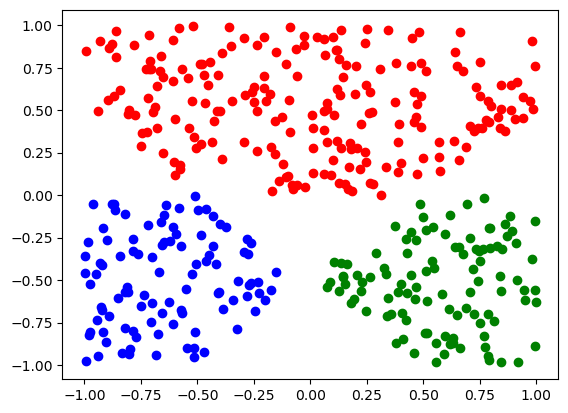

<Figure size 640x480 with 0 Axes>

In [4]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [5]:
my_mlp = MyMLP([2,3])

In [6]:
my_mlp.train(X , Y, is_classification=True, iteration_count=100000, alpha=0.01)


predictions =[my_mlp.predict(x, is_classification=True) for x in X]
print(predictions)
accuracy = my_mlp.calculate_accuracy_multi_class(X,Y)
print(accuracy)



[[0.20388031837663423, 0.041955832352596145, 0.6260752138733443], [-0.039593405295964244, 0.8295569965583726, 0.14785062097988483], [0.1303683751064734, 0.8698158057016796, -0.11861895567909392], [-0.010366917435700266, 0.33478179098121535, 0.6188023853822406], [-0.25364659726272076, 0.8107907859308631, 0.3804759250297743], [-0.28000701225912794, 0.8217743836075663, 0.38350607910570117], [0.3776583612432709, 0.007617083844325965, 0.5205283393238705], [-0.2525957738585058, 0.815949150243955, 0.37014779821634214], [-0.03309989021763187, 0.43237812430613914, 0.5800558102131258], [0.03984861099171925, 0.31889986438671164, 0.5965047771118897], [0.42408362351298295, 0.8201827841753119, -0.29277161570710286], [-0.11871153621241998, 0.8207088849795492, 0.24037276046528455], [0.6752406531373356, -0.08917149429065829, 0.23692264764393353], [0.03749005320550033, 0.8874956229374341, -0.08508291306959127], [0.6739379518349194, -0.3235695226815937, 0.3974469596126561], [0.31980785034188397, 0.894911

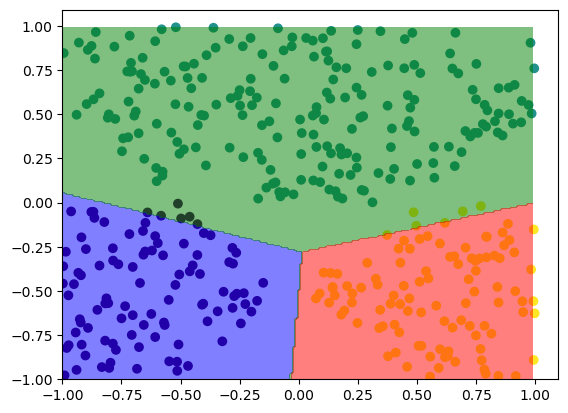

In [7]:
x_min, x_max = -1., 1.
y_min, y_max = -1., 1.
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
gridpoints = np.c_[xx.ravel(), yy.ravel()]

output_ptr =  [my_mlp.predict(x, is_classification=True) for x in gridpoints]
output_ptr = np.array(output_ptr)

plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1))

contour = np.argmax(output_ptr, axis=1).reshape(xx.shape)
plt.contourf(xx, yy, contour, levels=[-np.inf, 0.5, 1.5, np.inf], colors=['blue', 'green', 'red'],
             alpha=0.5)

plt.show()

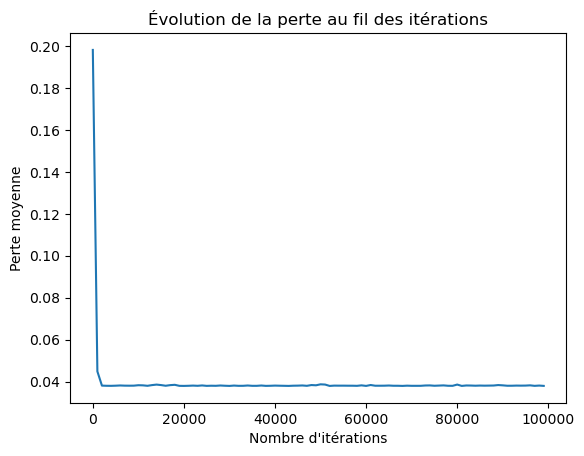

In [8]:
tab =(my_mlp.loss)
plt.plot(range(0, len(tab) * 1000, 1000), tab)  # Utilisez len(tab) pour déterminer la longueur correcte de l'axe x
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Perte moyenne')
plt.title('Évolution de la perte au fil des itérations')
plt.show()
#title